# Elecciones Madrid 2021 #

## Objetivo del presente trabajo ##

El presente trabajo tiene como objetivo analizar los resultados de las pasadas elecciones del 4 de mayo en Madrid. Para ello se utlizarán los resultados electorales oficiales del siguiente enlace [https://resultados2021.comunidad.madrid/Mesas/es]. Se analizarán los resultados a nivel global de la Comunidad de Madrid, para luego pasar a un análisis más pormenorizado de la siguiente forma: Madrid Ciudad, conjunto de ciudades de relevancia y el conjunto de ciudades y pueblos fuera de los principales núcleos de población.

Se analizarán los datos en su conjunto para luego incidir en la distribución espacial del voto de los partidos que finalmente obtuvieron representación. Un análisis de la edad de la población en cada uno de los espacios (edad, nivel adquisitivo, etc) nos permitirá saber si exise un claro perfil de votante para cada uno de los partidos.

In [1]:
# leer csv:
import pandas as pd

In [2]:
data = pd.read_csv('Elecciones_Madrid_2021_Municipios.csv', delimiter=';')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 33 columns):
Codcir                        179 non-null int64
Codmun                        179 non-null int64
Municipio                     179 non-null object
Unnamed: 3                    0 non-null float64
Censo                         179 non-null object
Certif. Alta                  179 non-null int64
Censo Total                   179 non-null object
Votos Totales                 179 non-null object
Votos Blancos                 179 non-null float64
Votos Nulos                   179 non-null float64
Abstención                    179 non-null float64
Votos Válidos                 179 non-null object
Votos Candidaturas            179 non-null object
Cs                            179 non-null float64
PUM+J                         179 non-null float64
PCTE                          179 non-null int64
FE de las JONS                179 non-null int64
PH                            179 non-null int

In [4]:
data.head()

,Codcir,Codmun,Municipio,Unnamed: 3,Censo,Certif. Alta,Censo Total,Votos Totales,Votos Blancos,Votos Nulos,...,PCOE-PCPE,VOLT,VOX,P-LIB,POLE,MÁS MADRID,EB,UDEC,PODEMOS-IU,RECORTES CERO-PCAS-TC-GV-M
0,28,2,Ajalvir,NaN,3.251,0,3.251,2.339,10.0,15.0,...,0,0.0,340.000,1,0,330.000,1.0,1,101.000,0
1,28,3,Alameda del Valle,NaN,195,0,195,168,3.0,0.0,...,0,0.0,16.000,0,0,36.000,0.0,0,11.000,0
2,28,5,Alcalá de Henares,NaN,136.163,4,136.167,100.932,603.0,789.0,...,25,45.0,9.735,21,10,15.540,70.0,26,7.017,29
3,28,6,Alcobendas,NaN,80.401,2,80.403,62.036,297.0,363.0,...,12,36.0,5.533,24,8,8.212,60.0,44,3.430,26
4,28,7,Alcorcón,NaN,126.919,0,126.919,97.563,565.0,769.0,...,20,35.0,7.841,14,4,16.945,128.0,24,7.707,66


In [5]:
data.iloc[-1]

Codcir                               28
Codmun                              183
Municipio                     Zarzalejo
Unnamed: 3                          NaN
Censo                             1.219
Certif. Alta                          0
Censo Total                       1.219
Votos Totales                       879
Votos Blancos                         2
Votos Nulos                           9
Abstención                          340
Votos Válidos                       870
Votos Candidaturas                  868
Cs                                   19
PUM+J                                 0
PCTE                                  0
FE de las JONS                        0
PH                                    0
PACMA                                 5
3e en acción                          0
PARTIDO AUTÓNOMOS                     0
P.S.O.E.                            148
PP                                  315
PCOE-PCPE                             0
VOLT                                  1


In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [7]:
municipios = 'https://raw.githubusercontent.com/FMullor/TopoJson/master/MadridMunicipios.geojson'
map_municipios = gpd.read_file(municipios)
map_municipios = map_municipios.sort_values('municipio')
map_municipios.head()

,id_0,iso,pais,id_1,communidad_,id_2,provincia,id_3,name_3,id_4,...,varname_4,ccn_4,cca_4,type_4,engtype_4,cpro,cmun,dc,codigo_post,geometry
156,215.0,ESP,Spain,8.0,Comunidad de Madrid,33.0,Madrid,234.0,n.a. (176),5876.0,...,None,0.0,None,Municipality,Municipality,28,002,9,28002,"MULTIPOLYGON (((-3.51150 40.53889, -3.50521 40..."
58,215.0,ESP,Spain,8.0,Comunidad de Madrid,33.0,Madrid,233.0,n.a. (175),5828.0,...,None,0.0,None,Municipality,Municipality,28,003,5,28003,"MULTIPOLYGON (((-3.80596 40.89047, -3.80951 40..."
86,215.0,ESP,Spain,8.0,Comunidad de Madrid,33.0,Madrid,234.0,n.a. (176),5877.0,...,None,0.0,None,Municipality,Municipality,28,005,3,28005,"MULTIPOLYGON (((-3.32142 40.47207, -3.32898 40..."
168,215.0,ESP,Spain,8.0,Comunidad de Madrid,33.0,Madrid,235.0,n.a. (177),5907.0,...,None,0.0,None,Municipality,Municipality,28,006,6,28006,"MULTIPOLYGON (((-3.67417 40.58897, -3.65981 40..."
154,215.0,ESP,Spain,8.0,Comunidad de Madrid,33.0,Madrid,235.0,n.a. (177),5908.0,...,None,0.0,None,Municipality,Municipality,28,007,2,28007,"MULTIPOLYGON (((-3.78781 40.35875, -3.79893 40..."


In [8]:
map_municipios.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 182 entries, 156 to 70
Data columns (total 21 columns):
id_0           182 non-null float64
iso            182 non-null object
pais           182 non-null object
id_1           182 non-null float64
communidad_    182 non-null object
id_2           182 non-null float64
provincia      182 non-null object
id_3           182 non-null float64
name_3         182 non-null object
id_4           182 non-null float64
municipio      182 non-null object
varname_4      2 non-null object
ccn_4          182 non-null float64
cca_4          0 non-null object
type_4         182 non-null object
engtype_4      182 non-null object
cpro           164 non-null object
cmun           164 non-null object
dc             164 non-null object
codigo_post    164 non-null object
geometry       182 non-null geometry
dtypes: float64(6), geometry(1), object(14)
memory usage: 31.3+ KB


In [9]:
map_municipios.iloc[0]

id_0                                                         215
iso                                                          ESP
pais                                                       Spain
id_1                                                           8
communidad_                                  Comunidad de Madrid
id_2                                                          33
provincia                                                 Madrid
id_3                                                         234
name_3                                                n.a. (176)
id_4                                                        5876
municipio                                                Ajalvir
varname_4                                                   None
ccn_4                                                          0
cca_4                                                       None
type_4                                              Municipality
engtype_4                

In [10]:
map_municipios.iloc[-1]

id_0                                                         215
iso                                                          ESP
pais                                                       Spain
id_1                                                           8
communidad_                                  Comunidad de Madrid
id_2                                                          33
provincia                                                 Madrid
id_3                                                         237
name_3                                                n.a. (179)
id_4                                                        5987
municipio                                              Zarzalejo
varname_4                                                   None
ccn_4                                                          0
cca_4                                                       None
type_4                                              Municipality
engtype_4                

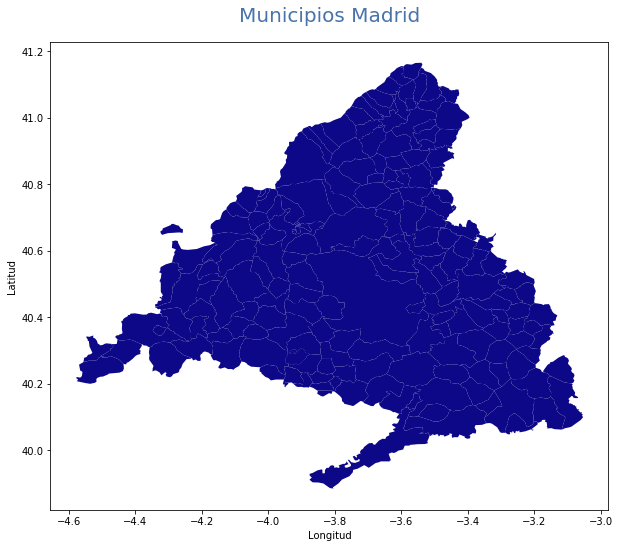

In [11]:
# Control del tamaño de la figura del mapa
fig, ax = plt.subplots(figsize=(10, 10))
 
# Control del título y los ejes
ax.set_title('Municipios Madrid', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
 
# Mostrar el mapa finalizado
map_municipios.plot(column='id_0', cmap='plasma', ax=ax, zorder=5)

In [12]:
# pruebas elecciones
# siguiente paso: añadirle al dataframe "data" la columna 'geometry' de "map_municipios" 
# agrupando por código postal, código de municipio, etc

# pasamos a numeric columnas de los datasets:
data['Codcir'] = pd.to_numeric(data['Codcir'])

map_municipios['cpro'] = pd.to_numeric(map_municipios['cpro'])
map_municipios['cmun'] = pd.to_numeric(map_municipios['cmun'])

#pruebas: cogemos cervera de buitrago en ambos datasets y juntamos la info.

# cervera_data = data[data['Codcir'] == '28']
# cervera_data = data[data['Municipio'] == 'Cervera de Buitrago']
# cervera_data

In [13]:
map_municipios.head()

,id_0,iso,pais,id_1,communidad_,id_2,provincia,id_3,name_3,id_4,...,varname_4,ccn_4,cca_4,type_4,engtype_4,cpro,cmun,dc,codigo_post,geometry
156,215.0,ESP,Spain,8.0,Comunidad de Madrid,33.0,Madrid,234.0,n.a. (176),5876.0,...,None,0.0,None,Municipality,Municipality,28.0,2.0,9,28002,"MULTIPOLYGON (((-3.51150 40.53889, -3.50521 40..."
58,215.0,ESP,Spain,8.0,Comunidad de Madrid,33.0,Madrid,233.0,n.a. (175),5828.0,...,None,0.0,None,Municipality,Municipality,28.0,3.0,5,28003,"MULTIPOLYGON (((-3.80596 40.89047, -3.80951 40..."
86,215.0,ESP,Spain,8.0,Comunidad de Madrid,33.0,Madrid,234.0,n.a. (176),5877.0,...,None,0.0,None,Municipality,Municipality,28.0,5.0,3,28005,"MULTIPOLYGON (((-3.32142 40.47207, -3.32898 40..."
168,215.0,ESP,Spain,8.0,Comunidad de Madrid,33.0,Madrid,235.0,n.a. (177),5907.0,...,None,0.0,None,Municipality,Municipality,28.0,6.0,6,28006,"MULTIPOLYGON (((-3.67417 40.58897, -3.65981 40..."
154,215.0,ESP,Spain,8.0,Comunidad de Madrid,33.0,Madrid,235.0,n.a. (177),5908.0,...,None,0.0,None,Municipality,Municipality,28.0,7.0,2,28007,"MULTIPOLYGON (((-3.78781 40.35875, -3.79893 40..."


In [14]:
len(data)

179

In [15]:
len(map_municipios)

182

In [16]:
data['geometry'] = map_municipios['geometry']

In [17]:
from geopandas import GeoDataFrame
data = GeoDataFrame(data)

In [18]:
data.head()

,Codcir,Codmun,Municipio,Unnamed: 3,Censo,Certif. Alta,Censo Total,Votos Totales,Votos Blancos,Votos Nulos,...,VOLT,VOX,P-LIB,POLE,MÁS MADRID,EB,UDEC,PODEMOS-IU,RECORTES CERO-PCAS-TC-GV-M,geometry
0,28,2,Ajalvir,NaN,3.251,0,3.251,2.339,10.0,15.0,...,0.0,340.000,1,0,330.000,1.0,1,101.000,0,"MULTIPOLYGON (((-3.49852 40.90831, -3.49522 40..."
1,28,3,Alameda del Valle,NaN,195,0,195,168,3.0,0.0,...,0.0,16.000,0,0,36.000,0.0,0,11.000,0,"MULTIPOLYGON (((-3.55791 40.12550, -3.56208 40..."
2,28,5,Alcalá de Henares,NaN,136.163,4,136.167,100.932,603.0,789.0,...,45.0,9.735,21,10,15.540,70.0,26,7.017,29,"MULTIPOLYGON (((-3.74140 40.27151, -3.75447 40..."
3,28,6,Alcobendas,NaN,80.401,2,80.403,62.036,297.0,363.0,...,36.0,5.533,24,8,8.212,60.0,44,3.430,26,"MULTIPOLYGON (((-3.48280 40.66761, -3.48092 40..."
4,28,7,Alcorcón,NaN,126.919,0,126.919,97.563,565.0,769.0,...,35.0,7.841,14,4,16.945,128.0,24,7.707,66,"MULTIPOLYGON (((-3.47978 40.49453, -3.47641 40..."


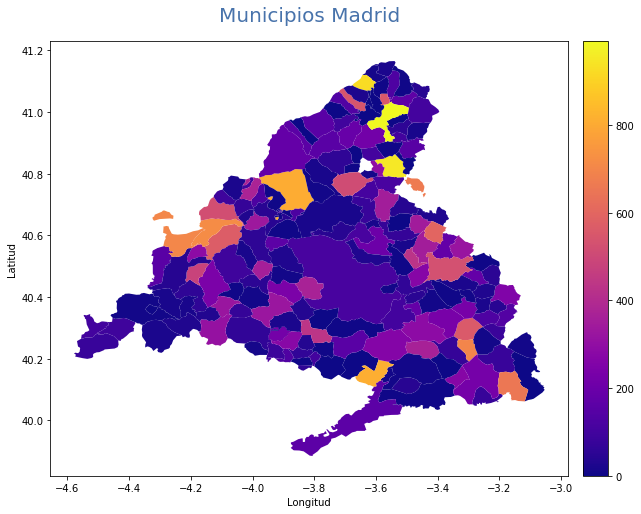

In [19]:
# Control del tamaño de la figura del mapa
fig, ax = plt.subplots(figsize=(10, 10))
 
# Control del título y los ejes
ax.set_title('Municipios Madrid', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Añadir la leyenda separada del mapa
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
 
# Mostrar el mapa finalizado
data.plot(column='PODEMOS-IU', cmap='plasma',legend=True, cax=cax, ax=ax, zorder=5)

In [21]:
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/FMullor/TopoJson/master/MadridMunicipios.geojson') as response:
    municipalities = json.load(response)

import plotly.express as px

fig = px.choropleth_mapbox(
                           data, 
                           geojson=municipalities, 
                           locations='Municipio', 
                           color='PP',
                           featureidkey="properties.municipios",
                           color_continuous_scale="Viridis",
                           range_color=(0, 12),
                           mapbox_style="carto-positron",
                           zoom=3, 
                           center = {"lat": 40.6, "lon": -3.8},
                           opacity=0.5,
                           labels={'PP':'PP'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()